### Part (a)
Read the data into Python

In [19]:
import polars as pl

college = pl.read_csv("../datasets/College.csv")

### Part (b)
Change column name

In [20]:
college = college.rename({college.columns[0] : "College"})

### Part (c)
Produce a numerical summary of the variables in the data set

In [21]:
out = college.select(pl.col("*").exclude("College"))
out.describe()

describe,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""777""",777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
"""std""",null,3870.201484,2451.113971,929.17619,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.10536,677.071454,16.328155,14.722359,3.958349,12.391801,5221.76844,17.17771
"""min""","""No""",81.0,72.0,35.0,1.0,9.0,139.0,1.0,2340.0,1780.0,96.0,250.0,8.0,24.0,2.5,0.0,3186.0,10.0
"""25%""",null,776.0,604.0,242.0,15.0,41.0,992.0,95.0,7320.0,3597.0,470.0,850.0,62.0,71.0,11.5,13.0,6751.0,53.0
"""50%""",null,1558.0,1110.0,434.0,23.0,54.0,1707.0,353.0,9990.0,4200.0,500.0,1200.0,75.0,82.0,13.6,21.0,8377.0,65.0
"""75%""",null,3624.0,2424.0,902.0,35.0,69.0,4005.0,967.0,12925.0,5050.0,600.0,1700.0,85.0,92.0,16.5,31.0,10830.0,78.0
"""max""","""Yes""",48094.0,26330.0,6392.0,96.0,100.0,31643.0,21836.0,21700.0,8124.0,2340.0,6800.0,103.0,100.0,39.8,64.0,56233.0,118.0


### Part (d)
Produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

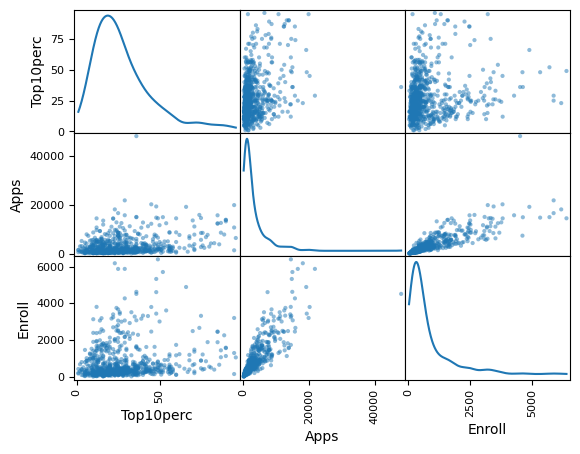

In [22]:
import pandas as pd

college_pd = college.to_pandas()
pd.plotting.scatter_matrix(college_pd[["Top10perc", "Apps", "Enroll"]], diagonal='kde')

### Part (e)
Produce a side-by-side boxplots of "Outstate" versus "Private"

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

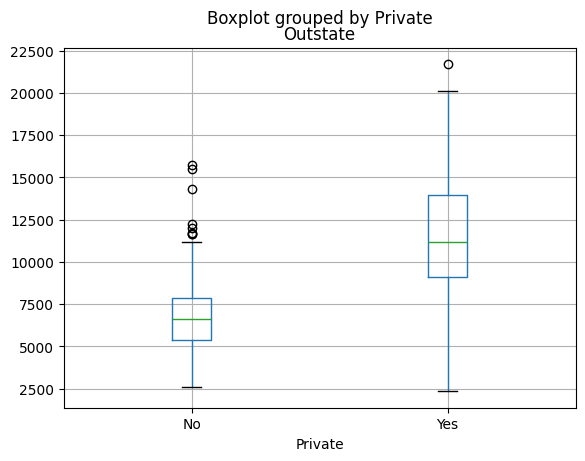

In [23]:
college_pd.boxplot("Outstate","Private")

### Part (f)
Create a new qualitative variable called "Elite"

In [24]:
college = college.with_columns(
    (pl.col("Top10perc") < 50)
    .map_dict({True : "No", False : "Yes"})
    .alias("Elite")
)

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

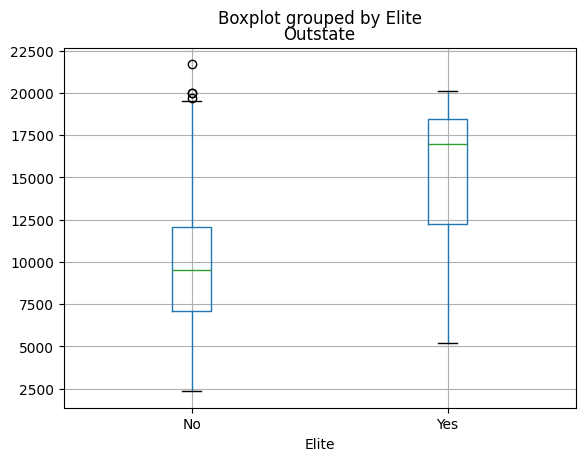

In [27]:
college_pd = college.to_pandas()
college_pd.boxplot("Outstate", "Elite")

### Part (g)
Produce some histograms!

array([[<Axes: title={'center': 'Apps'}>,
        <Axes: title={'center': 'Accept'}>,
        <Axes: title={'center': 'Enroll'}>,
        <Axes: title={'center': 'Top10perc'}>],
       [<Axes: title={'center': 'Top25perc'}>,
        <Axes: title={'center': 'F.Undergrad'}>,
        <Axes: title={'center': 'P.Undergrad'}>,
        <Axes: title={'center': 'Outstate'}>],
       [<Axes: title={'center': 'Room.Board'}>,
        <Axes: title={'center': 'Books'}>,
        <Axes: title={'center': 'Personal'}>,
        <Axes: title={'center': 'PhD'}>],
       [<Axes: title={'center': 'Terminal'}>,
        <Axes: title={'center': 'S.F.Ratio'}>,
        <Axes: title={'center': 'perc.alumni'}>,
        <Axes: title={'center': 'Expend'}>],
       [<Axes: title={'center': 'Grad.Rate'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

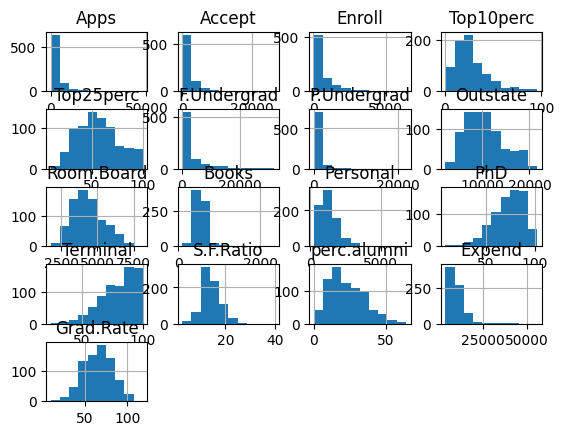

In [28]:
college_pd.hist()

### Part (h)
Continue exploring the data, and provide a brief summary of your discoveries!

(array([0.00052411, 0.00157233, 0.00733753, 0.01572327, 0.0293501 ,
        0.02515723, 0.0172956 , 0.00890985, 0.00314465, 0.00209644]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 [<matplotlib.patches.Polygon at 0x2a5fd1120>])

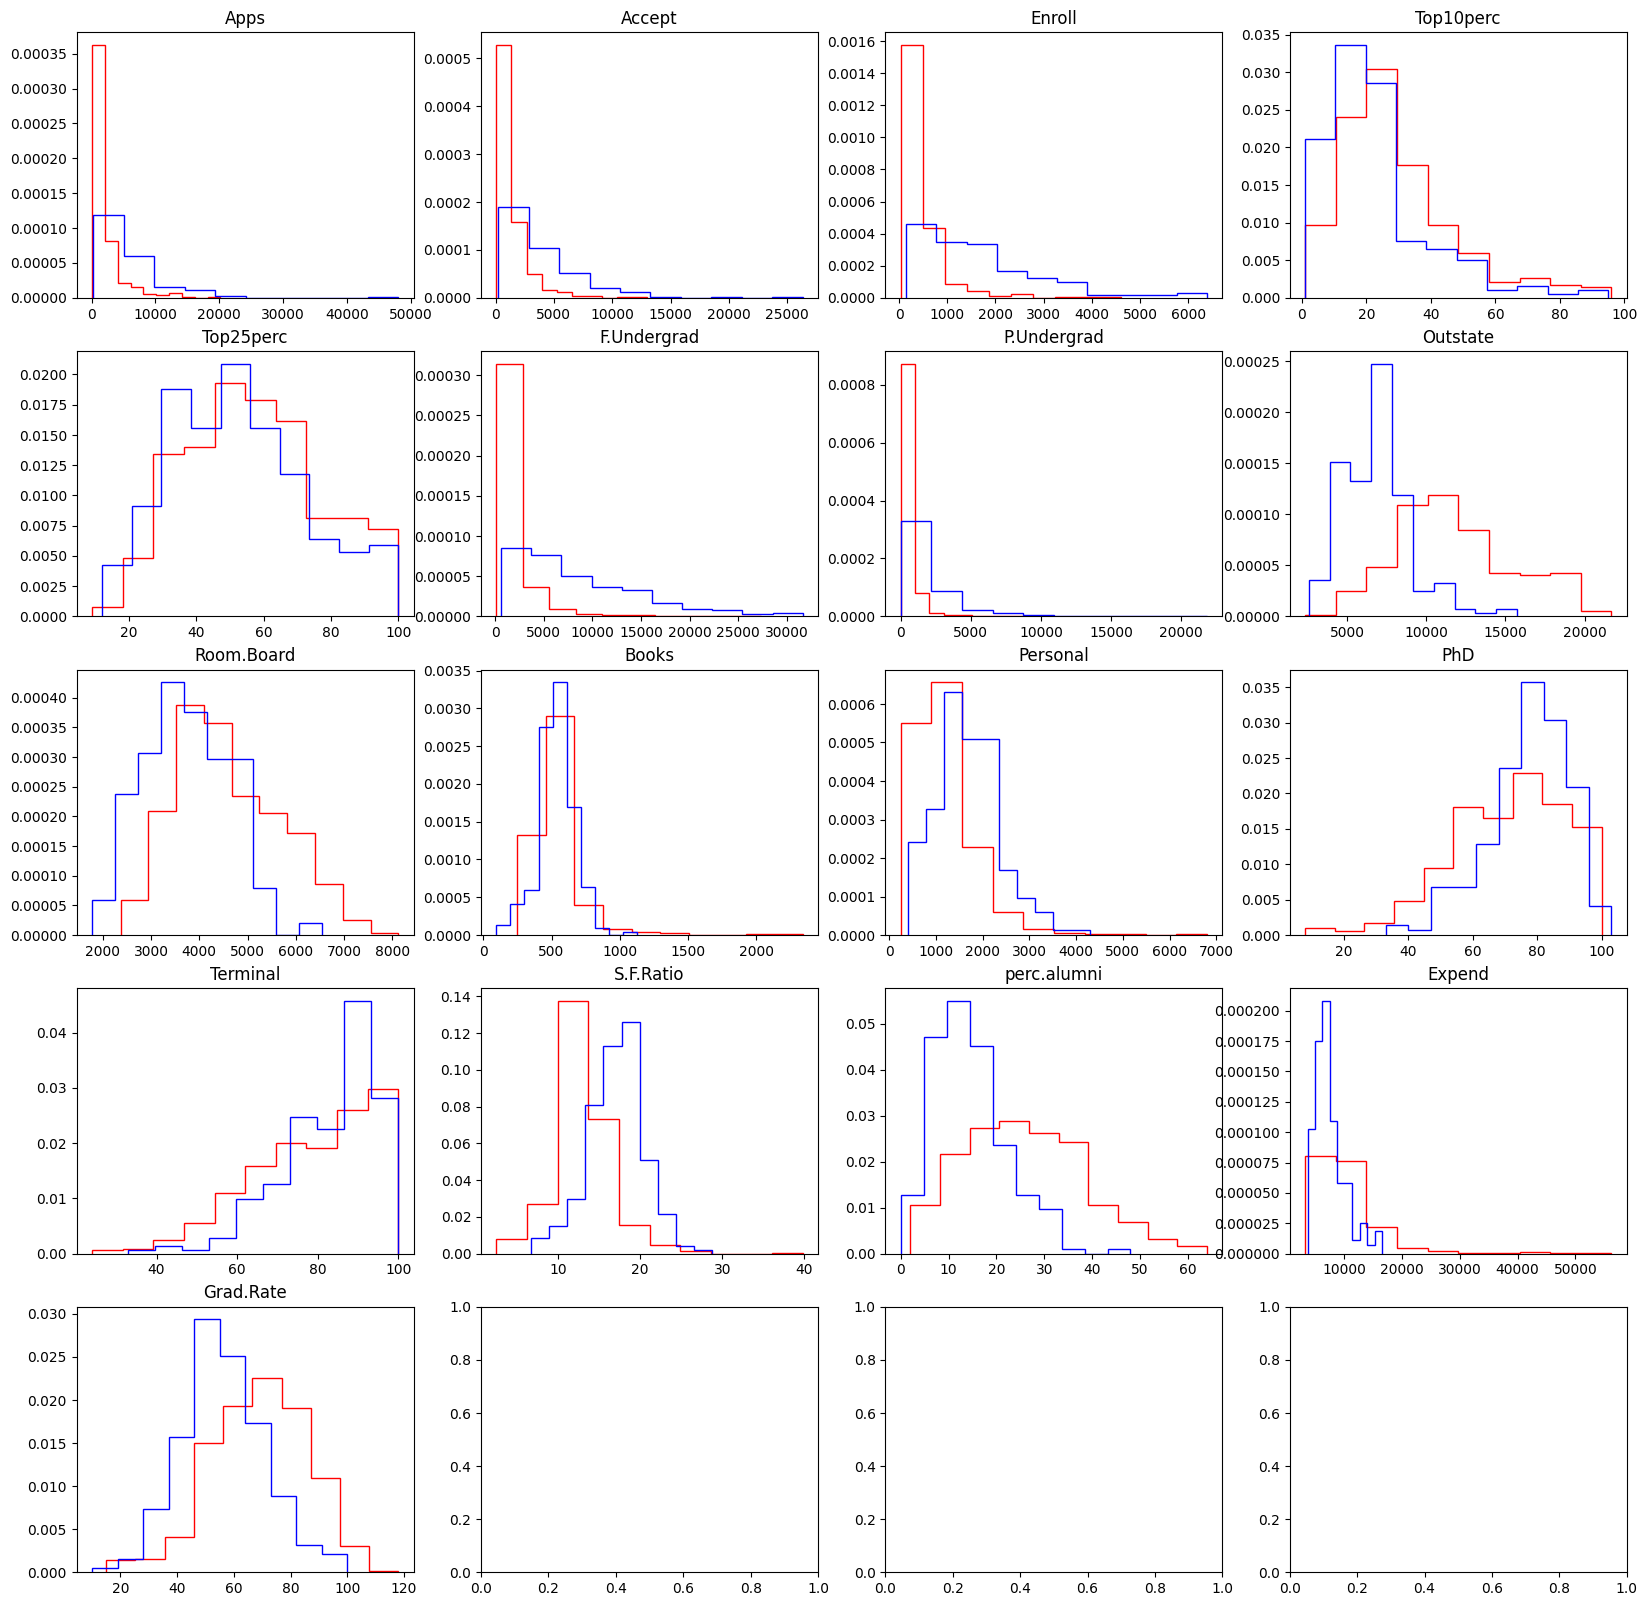

In [59]:
import matplotlib.pyplot as plt

privates = college_pd[college_pd["Private"] == "Yes"]
non_privates = college_pd[college_pd["Private"] == "No"]

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
axs[0,0].set_title("Apps")
axs[0,0].hist(privates["Apps"], histtype='step', density=True, color="red")
axs[0,0].hist(non_privates["Apps"], histtype='step', density=True, color="blue")

axs[0,1].set_title("Accept")
axs[0,1].hist(privates["Accept"], histtype='step', density=True, color="red")
axs[0,1].hist(non_privates["Accept"], histtype='step', density=True, color="blue")

axs[0,2].set_title("Enroll")
axs[0,2].hist(privates["Enroll"], histtype='step', density=True, color="red")
axs[0,2].hist(non_privates["Enroll"], histtype='step', density=True, color="blue")

axs[0,3].set_title("Top10perc")
axs[0,3].hist(privates["Top10perc"], histtype='step', density=True, color="red")
axs[0,3].hist(non_privates["Top10perc"], histtype='step', density=True, color="blue")

axs[1,0].set_title("Top25perc")
axs[1,0].hist(privates["Top25perc"], histtype='step', density=True, color="red")
axs[1,0].hist(non_privates["Top25perc"], histtype='step', density=True, color="blue")

axs[1,1].set_title("F.Undergrad")
axs[1,1].hist(privates["F.Undergrad"], histtype='step', density=True, color="red")
axs[1,1].hist(non_privates["F.Undergrad"], histtype='step', density=True, color="blue")

axs[1,2].set_title("P.Undergrad")
axs[1,2].hist(privates["P.Undergrad"], histtype='step', density=True, color="red")
axs[1,2].hist(non_privates["P.Undergrad"], histtype='step', density=True, color="blue")

axs[1,3].set_title("Outstate")
axs[1,3].hist(privates["Outstate"], histtype='step', density=True, color="red")
axs[1,3].hist(non_privates["Outstate"], histtype='step', density=True, color="blue")

axs[2,0].set_title("Room.Board")
axs[2,0].hist(privates["Room.Board"], histtype='step', density=True, color="red")
axs[2,0].hist(non_privates["Room.Board"], histtype='step', density=True, color="blue")

axs[2,1].set_title("Books")
axs[2,1].hist(privates["Books"], histtype='step', density=True, color="red")
axs[2,1].hist(non_privates["Books"], histtype='step', density=True, color="blue")

axs[2,2].set_title("Personal")
axs[2,2].hist(privates["Personal"], histtype='step', density=True, color="red")
axs[2,2].hist(non_privates["Personal"], histtype='step', density=True, color="blue")

axs[2,3].set_title("PhD")
axs[2,3].hist(privates["PhD"], histtype='step', density=True, color="red")
axs[2,3].hist(non_privates["PhD"], histtype='step', density=True, color="blue")

axs[3,0].set_title("Terminal")
axs[3,0].hist(privates["Terminal"], histtype='step', density=True, color="red")
axs[3,0].hist(non_privates["Terminal"], histtype='step', density=True, color="blue")

axs[3,1].set_title("S.F.Ratio")
axs[3,1].hist(privates["S.F.Ratio"], histtype='step', density=True, color="red")
axs[3,1].hist(non_privates["S.F.Ratio"], histtype='step', density=True, color="blue")

axs[3,2].set_title("perc.alumni")
axs[3,2].hist(privates["perc.alumni"], histtype='step', density=True, color="red")
axs[3,2].hist(non_privates["perc.alumni"], histtype='step', density=True, color="blue")

axs[3,3].set_title("Expend")
axs[3,3].hist(privates["Expend"], histtype='step', density=True, color="red")
axs[3,3].hist(non_privates["Expend"], histtype='step', density=True, color="blue")

axs[4,0].set_title("Grad.Rate")
axs[4,0].hist(privates["Grad.Rate"], histtype='step', density=True, color="red")
axs[4,0].hist(non_privates["Grad.Rate"], histtype='step', density=True, color="blue")

There are great differences between Non-Private and Private Universities, particularly for "Outstate", "S.F.Ratio", "perc.alumni", "Expend".